# Programmierkurs Python

## Sitzung 5 - Schnittstellen

Wie können wir Python nutzen um mit der Außenwelt zu kommunizieren - sei es Internet oder auf dem eigenen Rechner Supercollider.

Wir wollen versuchen die Events von [Github](http://github.com) mithilfe von Supercollider zu sonifizieren. 

## Internet

Eine gute Bibliothek um mithilfe von Python einfach mit dem Internet zu agieren ist *requests* welche man sich darüber installieren kann das man in einem neuen Shell Fesnter den Befehel

```shell
pip3 install requests
```

ausführt.

In [1]:
import requests

Die Infos die wir sonifizieren wollen sind unter der Internetaddresse [https://api.github.com/events](https://api.github.com/events) erreichbar, welche man auch aus dem Webbrowser aufrufen kann.

Wir können mithilfe der *requests* Bibliothek auch leicht Informationen aus dem Internet abrufen.

In [2]:
r = requests.get('https://api.github.com/events')
r

<Response [200]>

Die *Response* vom GitHub Server ist 200, was bedeutet dass die Anfrage erfolgreich war.

Eine anderer bekannter Status Code ist 404 der benutzt wird wenn die Adresse unbekannt ist.

Mithilfe von `r.text` können wir uns den Textinhalt der Response anschauen. (Ich limitiere hier durch die *Slicing* Schreibweise den Output auf die ersten 200 Zeichen)

In [3]:
r.text[0:200]

'[{"id":"11456033479","type":"PushEvent","actor":{"id":60158507,"login":"nvgunnell","display_login":"nvgunnell","gravatar_id":"","url":"https://api.github.com/users/nvgunnell","avatar_url":"https://ava'

Die ersten 200 Zeichen von [google.com](http://www.google.com) sehen daher so aus.

In [4]:
requests.get('https://www.google.com').text[0:200]

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="de"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/goo'

Wenn wir mit einer *API (Application Programming Interface)* kommunizieren können wir die Antwort leicht in Objekte einer Programmiersprache übertragen.
Ein bekannter Standarad hierfür ist die [ReST API](https://www.wikiwand.com/de/Representational_State_Transfer), welche mit [JSON](https://www.wikiwand.com/de/JavaScript_Object_Notation) einen Datentyp zurückgibt, der einem Python Dictionary sehr ähnlich ist.

In [5]:
# umwandeln von github antwort in python dict
j = r.json()
j[0]  # wir zeigen nur den ersten Eintrag aus der Liste, welche j ist, an

{'id': '11456033479',
 'type': 'PushEvent',
 'actor': {'id': 60158507,
  'login': 'nvgunnell',
  'display_login': 'nvgunnell',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/nvgunnell',
  'avatar_url': 'https://avatars.githubusercontent.com/u/60158507?'},
 'repo': {'id': 236526827,
  'name': 'nvgunnell/nvgunnell.github.io',
  'url': 'https://api.github.com/repos/nvgunnell/nvgunnell.github.io'},
 'payload': {'push_id': 4597617952,
  'size': 1,
  'distinct_size': 1,
  'ref': 'refs/heads/master',
  'head': 'b5a65c45361e9af7cb21a40068d6a623afd9a5e7',
  'before': 'd544aeddc000f7cc0ac548d531883328e9031599',
  'commits': [{'sha': 'b5a65c45361e9af7cb21a40068d6a623afd9a5e7',
    'author': {'email': '60158507+nvgunnell@users.noreply.github.com',
     'name': 'nvgunnell'},
    'message': 'Update UnitConverter.css',
    'distinct': True,
    'url': 'https://api.github.com/repos/nvgunnell/nvgunnell.github.io/commits/b5a65c45361e9af7cb21a40068d6a623afd9a5e7'}]},
 'public': True,
 'creat

## Exkurs: Datenalyse

Python ist wahrscheinlich die Sprache die man zur Datenanalyse nutzt.
Ich will hier kurz zeigen wie man mithilfe von Bibliotheken wie [Pandas](http://pandas.pydata.org) sehr schnell und leicht einen Datensatz analysieren kann, jedoch gehe ich hier nicht tiefer darauf ein da dies ein Kurs für sich ist.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.DataFrame(j)
df.head()

,actor,created_at,id,org,payload,public,repo,type
0,"{'id': 60158507, 'login': 'nvgunnell', 'displa...",2020-02-06T20:20:51Z,11456033479,NaN,"{'push_id': 4597617952, 'size': 1, 'distinct_s...",True,"{'id': 236526827, 'name': 'nvgunnell/nvgunnell...",PushEvent
1,"{'id': 28676608, 'login': 'OtavioCastro', 'dis...",2020-02-06T20:20:51Z,11456033473,NaN,"{'push_id': 4597617962, 'size': 1, 'distinct_s...",True,"{'id': 235352341, 'name': 'OtavioCastro/spring...",PushEvent
2,"{'id': 160377, 'login': 'avoronkin', 'display_...",2020-02-06T20:20:51Z,11456033480,"{'id': 13398246, 'login': 'rust-lang-ru', 'gra...",{'action': 'started'},True,"{'id': 198659024, 'name': 'rust-lang-ru/async-...",WatchEvent
3,"{'id': 10810283, 'login': 'direwolf-github', '...",2020-02-06T20:20:51Z,11456033474,NaN,"{'push_id': 4597617960, 'size': 1, 'distinct_s...",True,"{'id': 238776821, 'name': 'direwolf-github/my-...",PushEvent
4,"{'id': 1402941, 'login': 'shantamcbain', 'disp...",2020-02-06T20:20:51Z,11456033431,NaN,"{'push_id': 4597617943, 'size': 1, 'distinct_s...",True,"{'id': 3338213, 'name': 'shantamcbain/ComServ'...",PushEvent


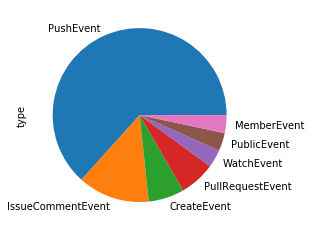

In [8]:
df['type'].value_counts().plot.pie()

Wir können so sehen dass die meisten Ergebnisse die uns Github anzeigt sogenannte *Push Events* sind.

## Supercollider Kommunikation

Die Frage ist nun wie wir die Daten von Python nach Supercollider geschickt bekommen.

Dazu kurz eine Zeichnung wie wir planen zu kommunizieren.

```

    Internet     |     Supercollider
       |         |      
       |         |        /|\
-------+---------|         |
       |         |         |  OSC Protokoll
http  \|/        |         |  
    Python ------+----------
   requests      |
                 |
    
```

Wir nutzen Python mit *requests* um Daten aus dem Internet an Supercollider zu schicken wobei wir dafür das [OSC Protokoll](https://www.wikiwand.com/de/Open_Sound_Control) nutzen.

Hierbei spielt uns die Server-Architektur von Supercollider in die Hände da so Supercollider auch eine Internetadresse hat die jedoch auf unserem eigenen Rechner aufzufinden ist.

Fahren wir nun einfach Supercollider hoch und schreiben in eine neue Datei den Code

```supercollider
s.boot;
NetAddr.localAddr
```
und führen diese aus.

Als Output sollten wir hierbei `a NetAddr(127.0.0.1, 57120)` bekommen.
`127.0.0.1` ist die Internet Adresse vom eigenen Rechner (man spricht auch von einer Netzwerk- oder IP Adresse da diese Adresse auch ohne Internet verfügbar ist) und `57120` der Port unter dem Supercollider auf diesem Rechner *lauscht*.

IP Adressen sind dabei einem Hochhaus entsprechend und Port einer Tür in diesem Hochhaus, unter der eine Anwendung Nachrichten annehmen kann.

### Python -> Supercollider

Eine Bibliothek um OSC Nachrichten zu verschicken ist [`pythonosc`](https://pypi.org/project/python-osc/), welche man sich mithilfe von

```shell
pip3 install python-osc
```

installieren kann.

Wir wollen zu Beginn erstmal eine Zahl von Python nach Supercollider via OSC schicken.

Dafür regestrieren wir in Supercollider einen [*OSCdef*](https://doc.sccode.org/Classes/OSCdef.html) der auf den Kanal `pythonTest` hört, ein Argument annimmt, dieses Argument in ein Integer umwandelt und printet.

```supercollider
(
OSCdef(\pythonTest, {|msg|
	var pythonNumber;
	pythonNumber = msg[1].asInteger;
	pythonNumber.postln;
}, '\pythonTest');
)
```

Die Einzelheiten kann man in der [Supercollider Dokumentation](https://doc.sccode.org/Guides/OSC_communication.html#Receiving%2520OSC%2520from%2520another%2520application) nochmal nachlesen.

Wir müssen nun in Python einen *Client* erstellen, der unsere OSC Nachricht an den Supercollider *Server* schickt.
Supercollider nutzt dafür [UDP](https://www.wikiwand.com/de/User_Datagram_Protocol).

In [10]:
from pythonosc import udp_client

In [17]:
# initierung des clienst ähnlich zu einem funktionsaufruf
client = udp_client.SimpleUDPClient(
    # addresse auf der supercollider läuft - 127.0.0.1 ist der eigene rechner
    address='127.0.0.1',
    # die "tür" von supercollider ist normal 57120
    port=57120,
)

In [23]:
client.send_message(
    address='/pythonTest',
    value=42,
)

Wir sollten in Supercollider den Wert `42` im *Post window* sehen.

### Klänge erzeugen

Wir fügen in Supercollider noch einen `SynthDef` *sine* hinzu der uns einen einfachen Sinus Ton erzeugen wird und als Parameter eine Frequenz `freq` annimmt.

```supercollider
OSCdef(\pythonNumber, {|msg|
	var pythonNumber;
	pythonNumber = msg[1].asInteger;
	{
		SinOsc.ar(pythonNumber, 0.0, EnvGen.kr(Env.linen(sustainTime: 0.2, releaseTime: 0.1), doneAction: Done.freeSelf));
	}.play;
});
```

In [25]:
client.send_message(
    address='/pythonNumber',
    value=420,
)

Man sollte einen kurzen Ton gehört haben.

### Wrap it all together

Fügen wir nun die Puzzleteile zusammen.
Anhand der [GitHub API Dokumentation](https://developer.github.com/v3/activity/events/#list-public-events) definieren wir ein Dictionary was einen String (also einem *type*) auf ein Integer (also eine Frequenz) *übersetzt*.

In [27]:
import time  # ermöglicht python code zu pausieren

In [26]:
freq_dict = {
    'PushEvent': 100,
    'CreateEvent': 1000,
    'IssuesEvent': 400,
    'PullRequestEvent': 800,
    'WatchEvent': 333,
    'ForkEvent': 200,
    'IssueCommentEvent': 500,
    'MemberEvent': 240,
    'PullRequestReviewCommentEvent': 555,
    'CommitCommentEvent': 252,
    'DeleteEvent': 566,
    'GollumEvent': 666,
}

In [28]:
for i in range(10):
    r = requests.get('https://api.github.com/events')
    j = r.json()
    for i in j:
        # .get erlaubt uns einen backup wert zu setzen (hier 50) falls der *key*
        # nicht im dictionary freq_dict vorhanden ist
        freq = freq_dict.get(i['type'], 50)
        client.send_message('/pythonNumber', freq)
        # warte 0.1 sekunden bevor die nächste OSC message gesendet wird
        time.sleep(0.1)

Im Repostiroy ist mit `github.mp3` eine Aufnahme aus Supercollider zu hören.

Wir hören das alle 30 Töne immer eine kurze Pause ertönt.
Dies liegt daran dass in dieser Zeit Python die neuen Ereignisse aus der GitHub API lädt und Python immer nur ein Sache erledigen kann und es sehr kompliziert ist Sachen paralell auszuführen (siehe [GIL - Global Interpreter Lock](https://wiki.python.org/moin/GlobalInterpreterLock)).

Wir sehen also dass Python Vor- und Nachteile hat - es ist sehr übersichtlich zu schreiben aber dafür nicht gut Sachen paralell auszuführen, was Supercollider sehr viel besser kann.

Dies ist der Grund warum es so viele verschiende Programmiersprachen gibt, da jede Sprache einen anderen Fokus legt.

Hinweis: Wenn man mehr als 60 Anfragen die Stunde an die API macht wird man gebannt von der API.
Die Variable `j` sieht dann wie folgt aus

```json
{
    "message": "API rate limit exceeded for xxx.xxx.xxx.xxx. (But here's the good news: Authenticated requests get a higher rate limit. Check out the documentation for more details.)",
    "documentation_url": "https://developer.github.com/v3/#rate-limiting"
}
```

## Ende!

Vielen Dank für das Besuchen und Zuhören.

Falls ihr Lust habt noch tiefer in das Programmieren einzusteigen sind hier ein paar gute Quellen:

* [W3 Schools](https://www.w3schools.com/html/default.asp): Kurs zum Lernen von HTML welches für Websiten benötigt wird
* [Learn you a Haskell](http://learnyouahaskell.com/): Tutorial zur funktionalen Programmiersprache Haskell
* [SuperCollider Tutorials - Eli Fieldsteel](https://www.youtube.com/watch?v=yRzsOOiJ_p4&list=PLPYzvS8A_rTaNDweXe6PX4CXSGq4iEWYC): YouTube Tutorial zu Supercollider
* [Automate the boring stuff](https://automatetheboringstuff.com/)